In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\Decision_Trees\Datasets\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"
# Means converting numerical column to categorical

In [4]:
df[df['Taxable.Income'] == 30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [5]:
threshold = 30000
df['Taxable.Income'] = pd.cut(df['Taxable.Income'], bins=[float('-inf'), threshold, float('inf')], labels=['Good', 'Risky'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Risky,50047,10,YES
1,YES,Divorced,Risky,134075,18,YES
2,NO,Married,Risky,160205,30,YES
3,YES,Single,Risky,193264,15,YES
4,NO,Married,Risky,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Risky,39492,7,YES
596,YES,Divorced,Risky,55369,2,YES
597,NO,Divorced,Risky,154058,0,YES
598,YES,Married,Risky,180083,17,NO


In [6]:
df = df.rename(columns = {'Marital.Status' : 'Marital_Status', 'Taxable.Income' : 'Taxable_Income',
                         'City.Population' : 'City_Population', 'Work.Experience' : 'Work_Experience'})
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,Risky,50047,10,YES
1,YES,Divorced,Risky,134075,18,YES
2,NO,Married,Risky,160205,30,YES
3,YES,Single,Risky,193264,15,YES
4,NO,Married,Risky,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Risky,39492,7,YES
596,YES,Divorced,Risky,55369,2,YES
597,NO,Divorced,Risky,154058,0,YES
598,YES,Married,Risky,180083,17,NO


<Axes: >

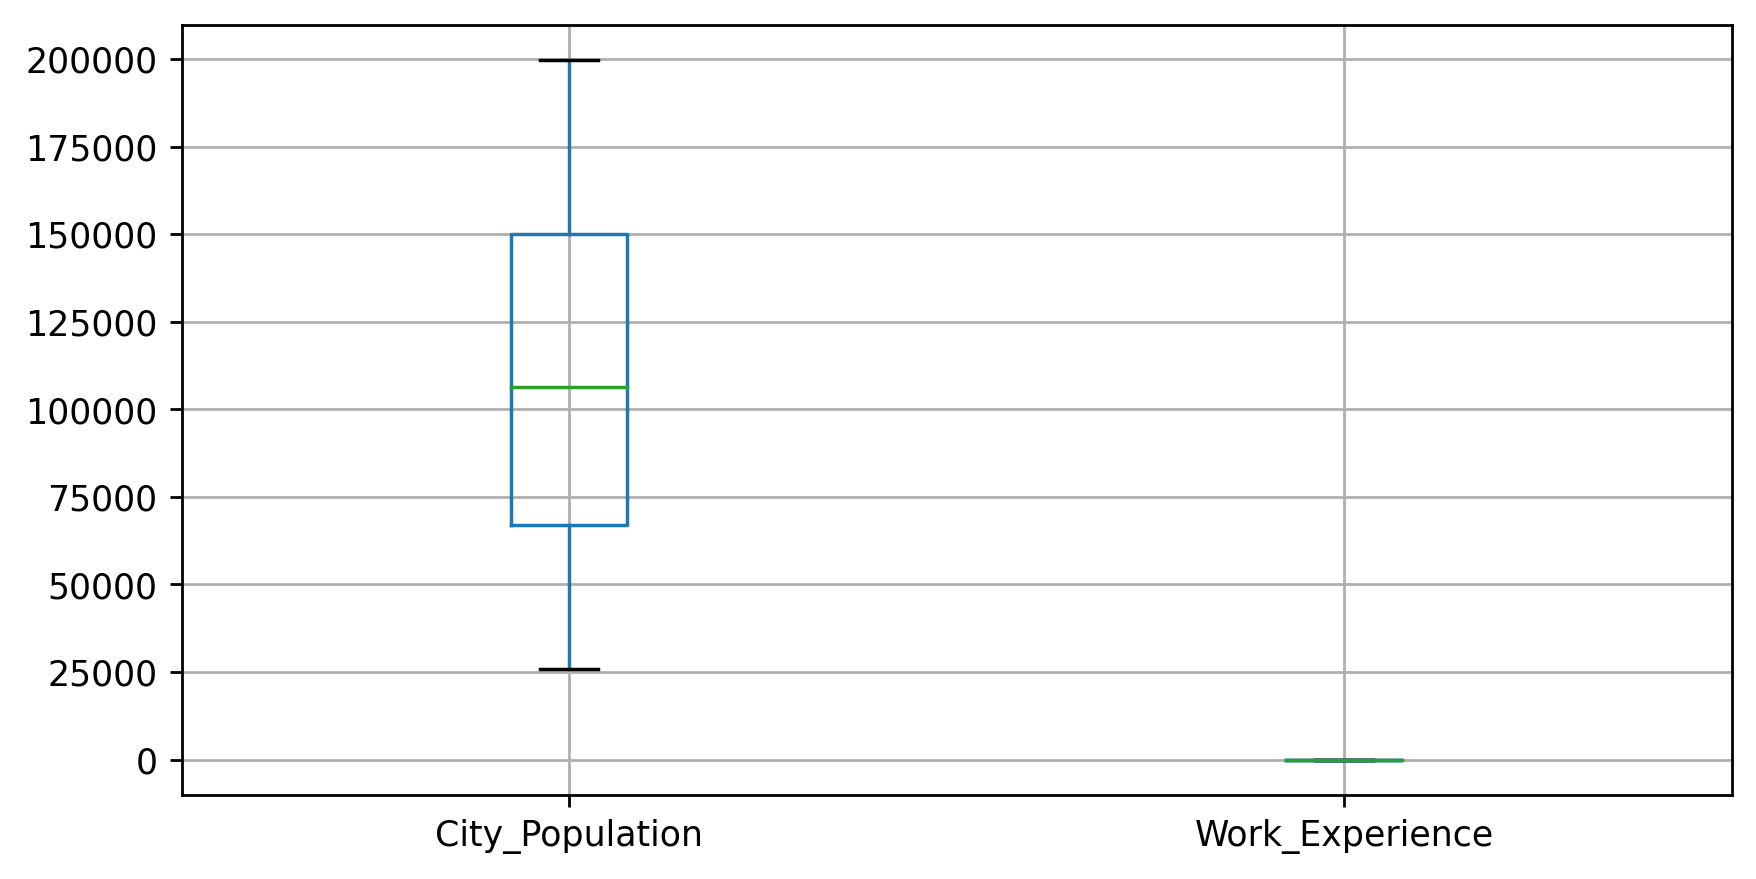

In [9]:
df.boxplot()

In [10]:
df = pd.get_dummies(df, columns = ['Undergrad', 'Marital_Status', 'Urban'])
df

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Risky,50047,10,1,0,0,0,1,0,1
1,Risky,134075,18,0,1,1,0,0,0,1
2,Risky,160205,30,1,0,0,1,0,0,1
3,Risky,193264,15,0,1,0,0,1,0,1
4,Risky,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Risky,39492,7,0,1,1,0,0,0,1
596,Risky,55369,2,0,1,1,0,0,0,1
597,Risky,154058,0,1,0,1,0,0,0,1
598,Risky,180083,17,0,1,0,1,0,1,0


In [11]:
df.corr()

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
City_Population,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work_Experience,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital_Status_Divorced,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital_Status_Married,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital_Status_Single,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


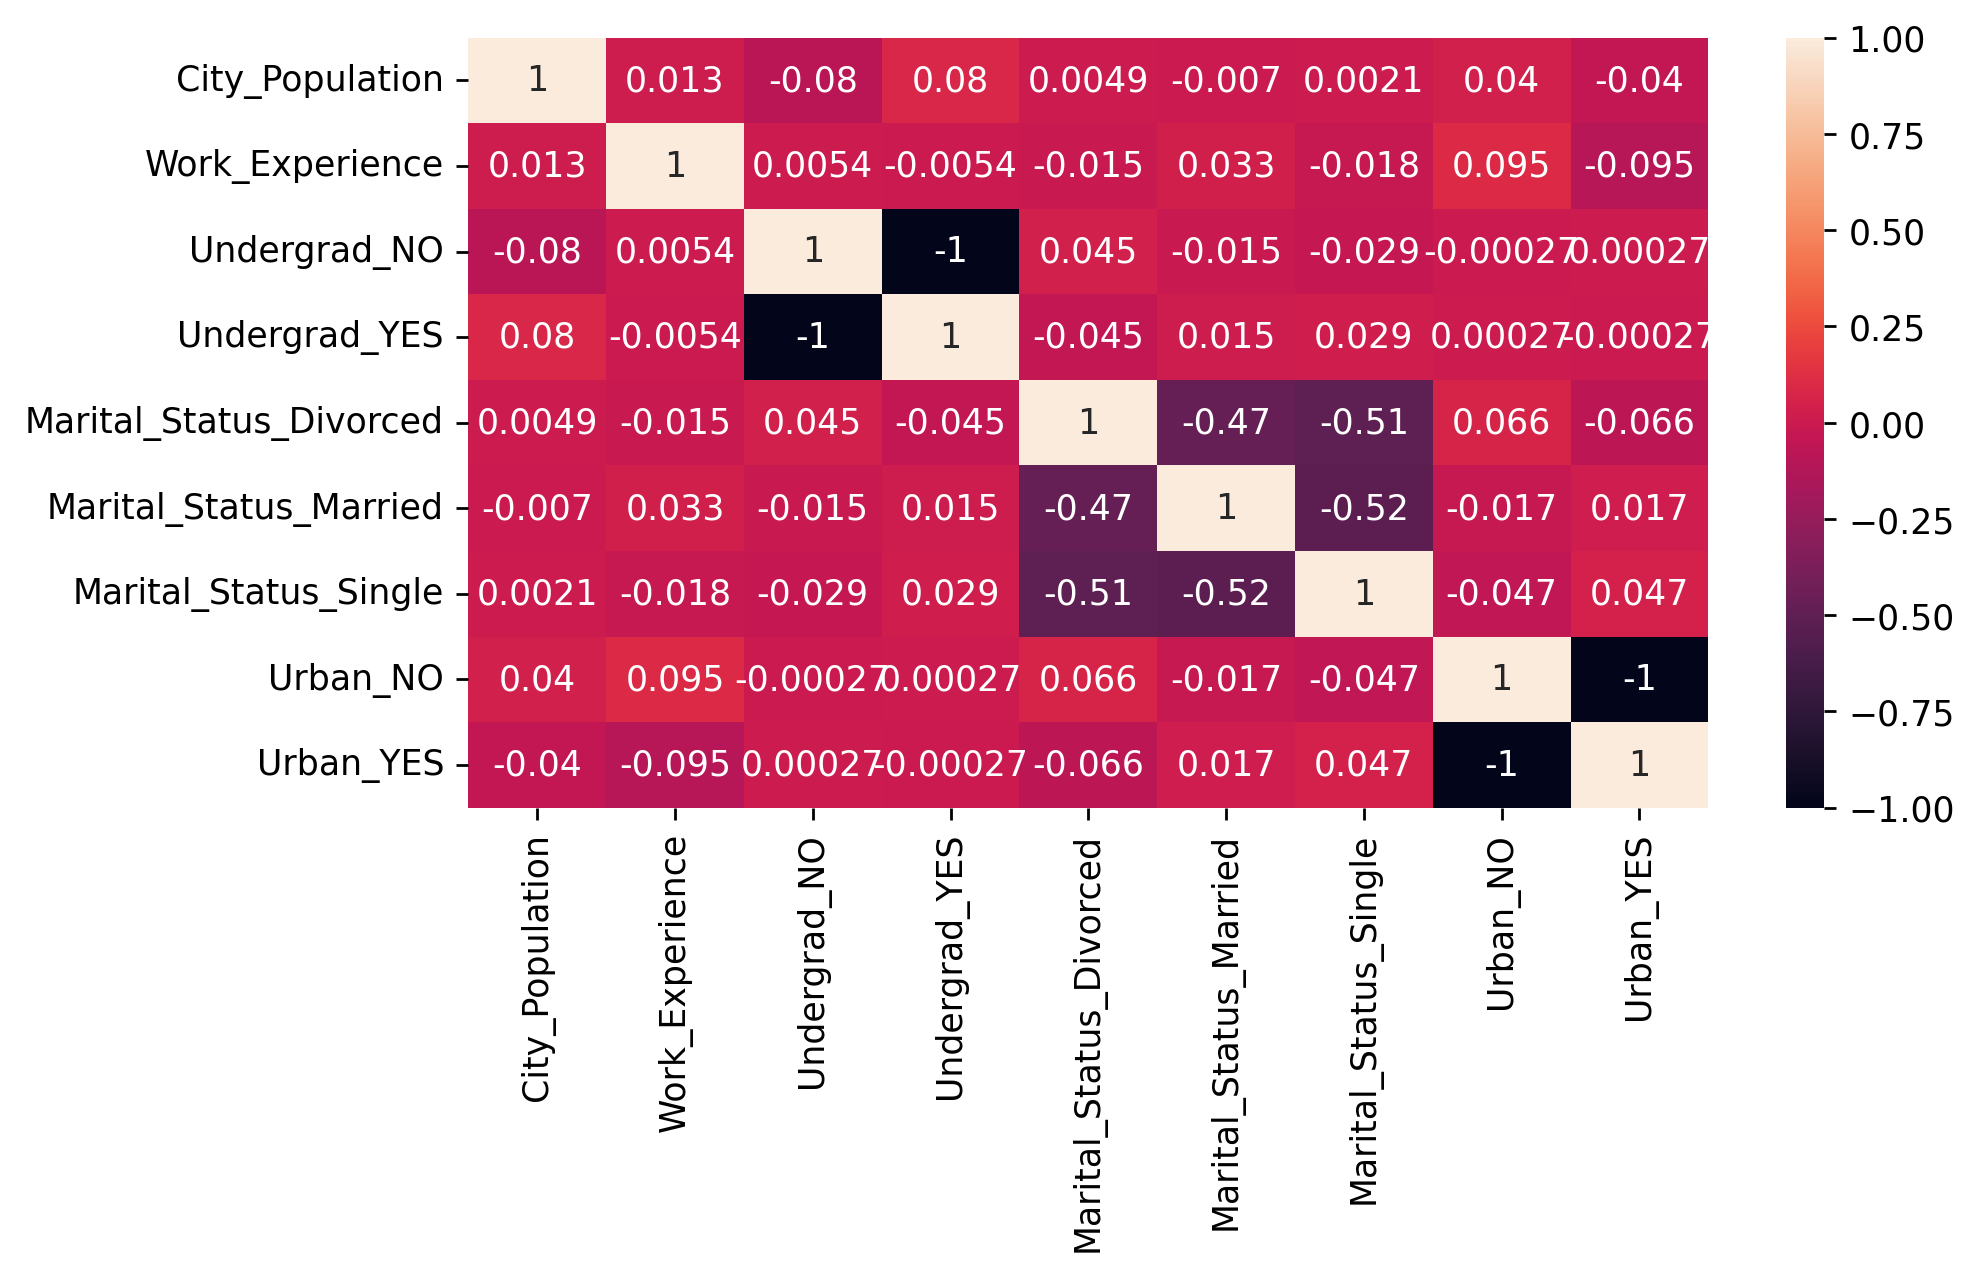

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# Spliting Data

In [19]:
x = df.iloc[:,1:]
y = df['Taxable_Income']

In [20]:
# Model Building

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)
ypred

array(['Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky',
       'Risky', 'Good', 'Risky', 'Risky'

In [23]:
# Model Evaluation

In [24]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

        Good       0.17      0.15      0.16        26
       Risky       0.77      0.80      0.79        94

    accuracy                           0.66       120
   macro avg       0.47      0.48      0.47       120
weighted avg       0.64      0.66      0.65       120



In [25]:
confusion_matrix(ytest, ypred)

array([[ 4, 22],
       [19, 75]], dtype=int64)

In [26]:
print('Training Accuracy =', dt.score(xtrain, ytrain))
print('Testing Accuracy =', dt.score(xtest, ytest))

Training Accuracy = 1.0
Testing Accuracy = 0.6583333333333333


In [27]:
# Here it looks like model is overfitted because there is more than 3% of difference in traing and testing accuracy
# as seen in confusion matrix 29 data points are not classified correctly

In [28]:
# Visualizing Decision Tree

In [29]:
x.columns

Index(['City_Population', 'Work_Experience', 'Undergrad_NO', 'Undergrad_YES',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [30]:
df['Taxable_Income'].unique()

['Risky', 'Good']
Categories (2, object): ['Good' < 'Risky']

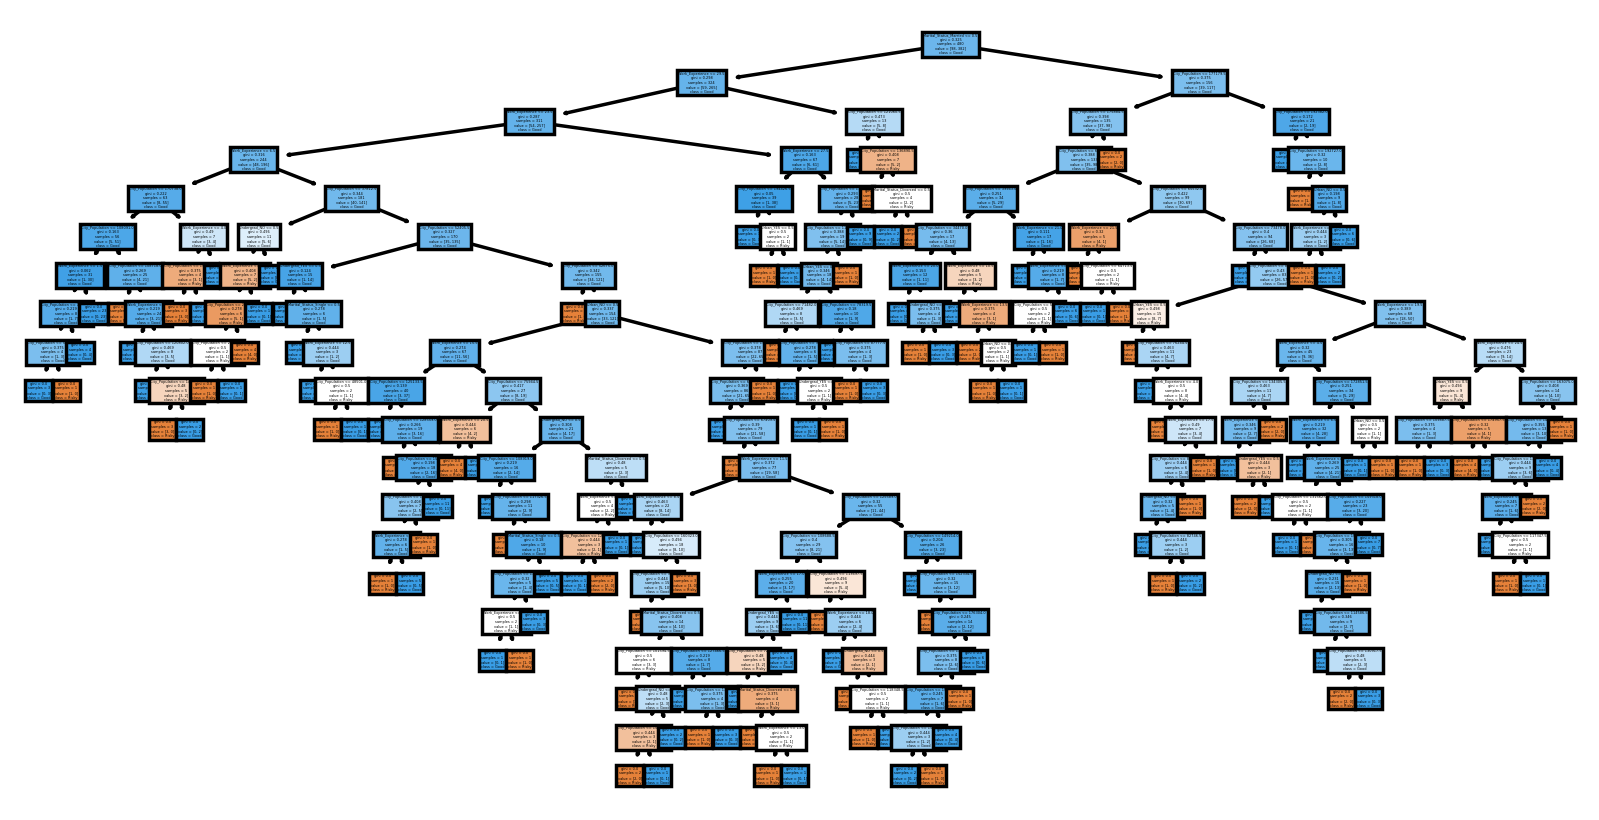

In [32]:
tree.plot_tree(dt, feature_names= ['City_Population', 'Work_Experience', 'Undergrad_NO', 'Undergrad_YES', 'Marital_Status_Divorced',
                                   'Marital_Status_Married', 'Marital_Status_Single', 'Urban_NO', 'Urban_YES'], 
               class_names=['Risky', 'Good'], 
               filled=True)
plt.show()

In [33]:
dt.feature_importances_

array([0.62387012, 0.21822747, 0.04292648, 0.02649856, 0.02477371,
       0.00622494, 0.00341917, 0.01948903, 0.03457052])

In [34]:
pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': dt.feature_importances_}).\
                    sort_values('importance', ascending = False)

,feature,importance
0,City_Population,0.623870
1,Work_Experience,0.218227
2,Undergrad_NO,0.042926
8,Urban_YES,0.034571
3,Undergrad_YES,0.026499
4,Marital_Status_Divorced,0.024774
7,Urban_NO,0.019489
5,Marital_Status_Married,0.006225
6,Marital_Status_Single,0.003419
